In [149]:
from sqw.tesselations import even_cycle_two_tesselation
from sqw.experiments import running
from sqw.states import uniform_initial_state, amp2prob
from sqw.statistics import states2mean, states2std, states2ipr, states2survival
from sqw.plots import final_distribution_plot, mean_plot, std_plot, ipr_plot, survival_plot
from sqw.utils import random_tesselation_order, random_angle_deviation, tesselation_choice

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.axes_grid1 import make_axes_locatable


##### 1 - SQW (Standard)

###### 1.1 - Dynamic: one initial node

In [135]:
N = 121
T = even_cycle_two_tesselation(N)
G = nx.cycle_graph(N)

steps = 20
angles = [[np.pi/3, np.pi/3]] * steps
tesselation_order = [[0,1] for x in range(steps)]
initial_state = uniform_initial_state(N, nodes = [N//2+1])

states_ua_ut = running(G, T, steps, 
                 initial_state, 
                 angles = angles, 
                 tesselation_order = tesselation_order)

In [136]:
final_dist = [amp2prob(x) for x in states_ua_ut]

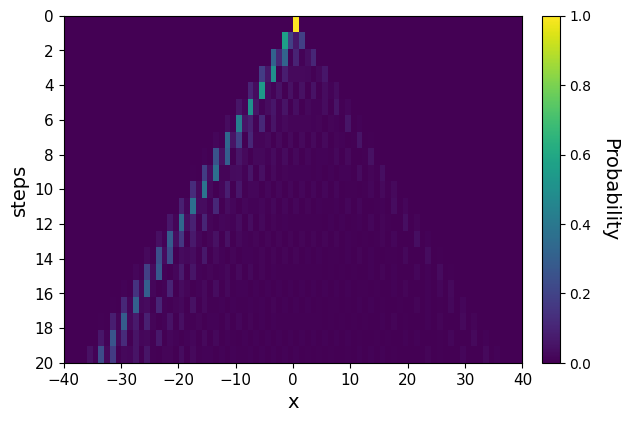

In [137]:
x = np.arange(-N//2, N//2, 1)
y = np.arange(0, steps, 1)
X, Y = np.meshgrid(x, y)

fig, ax = plt.subplots()

im = ax.imshow(final_dist,interpolation='None',cmap='viridis', extent = [-N//2, N//2, steps, 0])

ratio = 0.5
x_left, x_right = ax.get_xlim()
y_low, y_high = ax.get_ylim()
ax.set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)
ax.set_xlabel('x',fontsize = 14)
ax.set_ylabel('steps',fontsize = 14)
ax.tick_params(axis='both', which='major', labelsize=11)

ax.set_xlim([-40,40])

ax.set_yticks(np.arange(0, steps+1, 2))
ax.set_xticks(np.arange(-40, 41, 10))

cbar = fig.colorbar(im,fraction=0.035, pad=0.04)
cbar.set_label('Probability', rotation=270,labelpad=20,fontsize = 14)


# plt.savefig(f'images/sqw_N{N}_t{steps}_thetapi3-pi3_init0.png',bbox_inches='tight',dpi=300)
plt.show()

In [159]:
m, b = np.polyfit(range(0, steps+1)[8::], states2std(states_ua_ut, range(0, N))[8::], 1)
print(m)

[0.99869655]


###### 2.2 - Dynamic: two intial

In [125]:
N = 121
T = even_cycle_two_tesselation(N)
G = nx.cycle_graph(N)

steps = 20
angles = [[np.pi/3, np.pi/3]] * steps
tesselation_order = [[0,1] for x in range(steps)]
initial_state = uniform_initial_state(N, nodes = [N//2, N//2+1])


states_ua_ut = running(G, T, steps, 
                 initial_state, 
                 angles = angles, 
                 tesselation_order = tesselation_order)

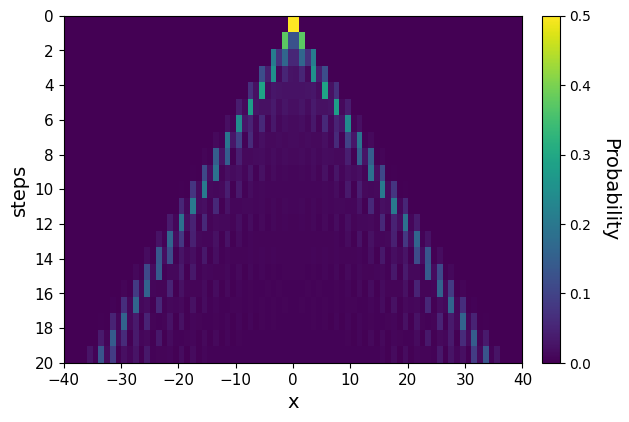

In [126]:
final_dist = [amp2prob(x) for x in states_ua_ut]

x = np.arange(-N//2, N//2, 1)
y = np.arange(0, steps, 1)
X, Y = np.meshgrid(x, y)

fig, ax = plt.subplots()

im = ax.imshow(final_dist,interpolation='None',cmap='viridis', extent = [-N//2, N//2, steps, 0])

ratio = 0.5
x_left, x_right = ax.get_xlim()
y_low, y_high = ax.get_ylim()
ax.set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)
ax.set_xlabel('x',fontsize = 14)
ax.set_ylabel('steps',fontsize = 14)
ax.tick_params(axis='both', which='major', labelsize=11)

ax.set_xlim([-40,40])

ax.set_yticks(np.arange(0, steps+1, 2))
ax.set_xticks(np.arange(-40, 41, 10))

cbar = fig.colorbar(im,fraction=0.035, pad=0.04)
cbar.set_label('Probability', rotation=270,labelpad=20,fontsize = 14)

plt.savefig(f'images/sqw_N{N}_t{steps}_thetapi3-pi3_init0-1.png',bbox_inches='tight',dpi=300)
plt.show()

###### 2.3 - Dynamic: one initial, different angles

In [133]:
N = 121
T = even_cycle_two_tesselation(N)
G = nx.cycle_graph(N)

steps = 20
angles = [[np.pi/8, np.pi/7]] * steps
tesselation_order = [[0,1] for x in range(steps)]
initial_state = uniform_initial_state(N, nodes = [N//2+1])


states_ua_ut = running(G, T, steps, 
                 initial_state, 
                 angles = angles, 
                 tesselation_order = tesselation_order)

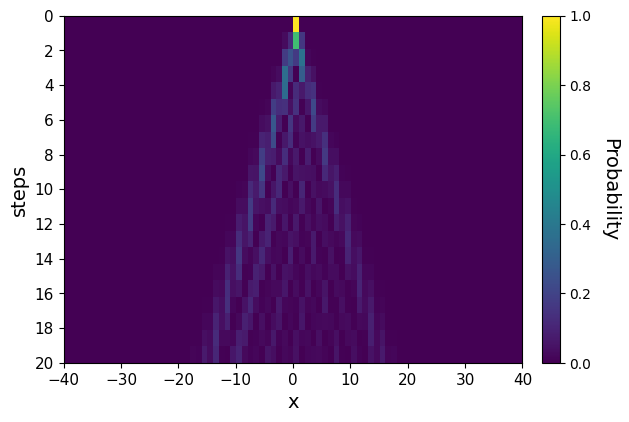

In [134]:
final_dist = [amp2prob(x) for x in states_ua_ut]

x = np.arange(-N//2, N//2, 1)
y = np.arange(0, steps, 1)
X, Y = np.meshgrid(x, y)

fig, ax = plt.subplots()

im = ax.imshow(final_dist,interpolation='None',cmap='viridis', extent = [-N//2, N//2, steps, 0])

ratio = 0.5
x_left, x_right = ax.get_xlim()
y_low, y_high = ax.get_ylim()
ax.set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)
ax.set_xlabel('x',fontsize = 14)
ax.set_ylabel('steps',fontsize = 14)
ax.tick_params(axis='both', which='major', labelsize=11)

ax.set_xlim([-40,40])

ax.set_yticks(np.arange(0, steps+1, 2))
ax.set_xticks(np.arange(-40, 41, 10))

cbar = fig.colorbar(im,fraction=0.035, pad=0.04)
cbar.set_label('Probability', rotation=270,labelpad=20,fontsize = 14)

plt.savefig(f'images/sqw_N{N}_t{steps}_thetapi8-pi7_init0.png',bbox_inches='tight',dpi=300)
plt.show()

###### 2.4 - Standard Deviation All Angles

In [198]:
N = 51
T = even_cycle_two_tesselation(N)
G = nx.cycle_graph(N)
steps = 10

tesselation_order = [[0,1] for x in range(steps)]
initial_state = uniform_initial_state(N, nodes = [N//2+1])

nt = 100
theta_vector = np.linspace(0, np.pi,nt)

std_matrix = np.zeros((nt,nt))

for t_0 in range(nt):
    for t_1 in range(nt):
        angles = [[theta_vector[t_0], theta_vector[t_1]]] * steps

        states_ua_ut = running(G, T, steps, 
                         initial_state, 
                         angles = angles, 
                         tesselation_order = tesselation_order)
        
        m, b = np.polyfit(range(0, steps+1)[4::], states2std(states_ua_ut, range(0, N))[4::], 1)
        std_matrix[t_0,t_1] = m


/var/folders/pw/1j77214d6klfy5lcpcwbkxtw0000gn/T/ipykernel_65796/1896516035.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  std_matrix[t_0,t_1] = m


KeyboardInterrupt: 

In [ ]:
fig, ax = plt.subplots()

im = ax.imshow(std_matrix,interpolation='None',cmap='viridis')
# ax.set_yticks(np.arange(0, steps+1, 2))
ax.set_xticks([0,nt/2, nt-1],[r'$0$', r'$\pi/2$',r'$\pi$'])
ax.set_yticks([0,nt/2, nt-1],[r'$0$', r'$\pi/2$',r'$\pi$'])
ax.set_ylabel(r'$\theta_1$',fontsize = 14)
ax.set_xlabel(r'$\theta_0$',fontsize = 14)
ax.tick_params(axis='both', which='major', labelsize=11)

cbar = fig.colorbar(im,fraction=0.035, pad=0.04)
cbar.set_label('m', rotation=270,labelpad=20,fontsize = 14)

##### 2 - Random Angles

In [154]:
N = 400
T = even_cycle_two_tesselation(N)
G = nx.cycle_graph(N)

steps = 80
angles = random_angle_deviation([np.pi/3, np.pi/3], [.6, .6], steps)
tesselation_order = [[0,1] for x in range(steps)]
initial_state = uniform_initial_state(N, nodes = [N//2])

states_ra_ut = running(G, T, steps, 
                 initial_state, 
                 angles = angles, 
                 tesselation_order = tesselation_order)

In [155]:
final_dist = [amp2prob(x) for x in states_ra_ut]

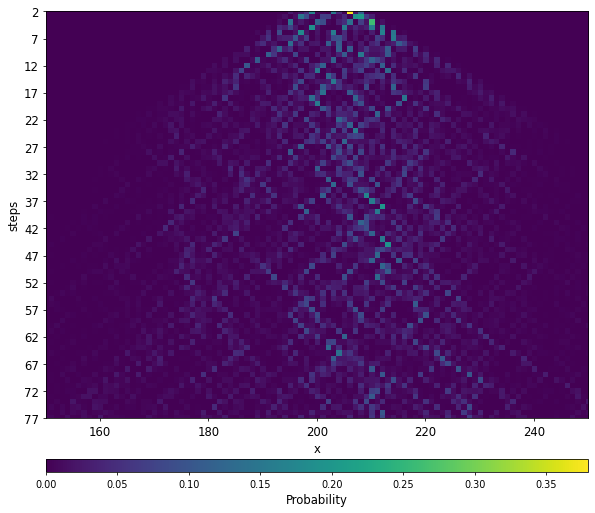

In [169]:
plt.figure(figsize=(10, 15),dpi=70)
plt.imshow(final_dist[2::],interpolation='nearest')
plt.xlabel('x',fontsize = 12)
plt.ylabel('steps',fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlim([150,250])
plt.ylim([steps-20,2])
plt.yticks(np.arange(2, steps+1, 5))
cbar = plt.colorbar(orientation='horizontal',pad=0.05, aspect=40)
cbar.set_label('Probability', fontsize = 12)


plt.savefig(f'sqw_ra_ut_n{N}_t{steps}_thetapi3pi3_d.4.4.png',bbox_inches='tight',dpi=300)
plt.show()


###### aaaa

In [196]:
N = 400
T = even_cycle_two_tesselation(N)
G = nx.cycle_graph(N)

steps = 80
angles = random_angle_deviation([np.pi/3, np.pi/3], [.2, .2], steps)
shift_prob = .1
tesselation_order = tesselation_choice([[0,1], [1,0]], steps, [1 - shift_prob, shift_prob])
initial_state = uniform_initial_state(N, nodes = [N//2])

states_ra_rts = running(G, T, steps, 
                 initial_state, 
                 angles = angles, 
                 tesselation_order = tesselation_order)

In [197]:
final_dist = [amp2prob(x) for x in states_ra_rts]

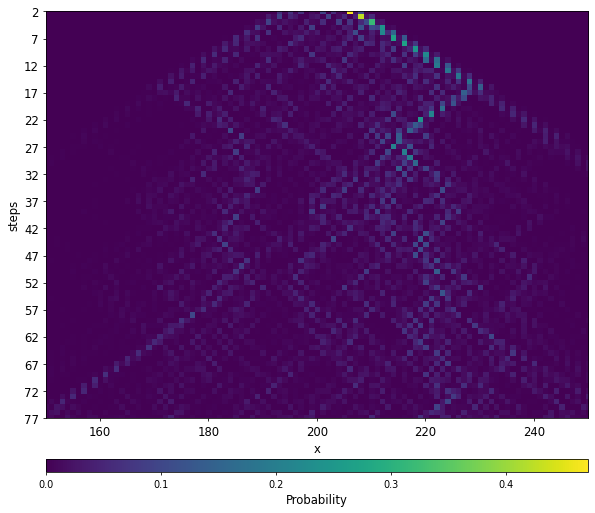

In [198]:
plt.figure(figsize=(10, 15),dpi=70)
plt.imshow(final_dist[2::],interpolation='nearest')
plt.xlabel('x',fontsize = 12)
plt.ylabel('steps',fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlim([150,250])
plt.ylim([steps-20,2])
plt.yticks(np.arange(2, steps+1, 5))
cbar = plt.colorbar(orientation='horizontal',pad=0.05, aspect=40)
cbar.set_label('Probability', fontsize = 12)


# plt.savefig(f'sqw_ra_ut_n{N}_t{steps}_thetapi3pi3_d.4.4.png',bbox_inches='tight',dpi=300)
plt.show()

In [33]:
3//2

1